In [1]:
import os
from collections import Counter
from matplotlib import pyplot as plt 
import seaborn as sns
import pickle



fp = "/dgxa_home/se20uari147/MHDETR/data"

In [2]:
os.listdir(fp)

['highlight_test_release.jsonl',
 'subs_train.jsonl',
 'LICENSE',
 'README.md',
 'highlight_train_release.jsonl',
 'highlight_val_release.jsonl']

In [3]:
os.path.join(fp, os.listdir(fp)[3])

'/dgxa_home/se20uari147/MHDETR/data/README.md'

In [4]:
import pandas as pd

train_df = pd.read_json("/dgxa_home/se20uari147/MHDETR/data/highlight_train_release.jsonl", lines = True)
test_df = pd.read_json(os.path.join(fp, os.listdir(fp)[0]), lines = True)
val_df = pd.read_json(os.path.join(fp, os.listdir(fp)[4]), lines = True)

In [5]:
pd.__version__

'2.0.3'

In [6]:
train_df

,qid,query,duration,vid,relevant_clip_ids,saliency_scores,relevant_windows
0,9769,some military patriots takes us through their ...,150,j7rJstUseKg_360.0_510.0,"[36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 48, 4...","[[4, 3, 2], [4, 1, 3], [4, 3, 4], [4, 1, 2], [...","[[72, 82], [84, 94], [96, 106], [108, 118], [1..."
1,10016,Man in baseball cap eats before doing his inte...,150,j7rJstUseKg_210.0_360.0,"[48, 49, 50, 51, 52, 53, 54, 55, 56]","[[2, 3, 3], [4, 3, 2], [2, 3, 1], [2, 3, 0], [...","[[96, 114]]"
2,10078,A man in a white shirt discusses the right to ...,150,j7rJstUseKg_60.0_210.0,"[24, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 4...","[[0, 2, 1], [0, 1, 1], [0, 1, 1], [0, 1, 1], [...","[[48, 50], [76, 120], [122, 138], [140, 146]]"
3,6812,A view of a bamboo fountain of water in a tea ...,150,-Oc6gSWB_HA_60.0_210.0,"[32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 4...","[[4, 2, 3], [3, 3, 3], [4, 3, 3], [4, 2, 3], [...","[[64, 92]]"
4,9247,The weather map shows large snowfall in the we...,150,G60-kHBEeZA_60.0_210.0,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...","[[2, 4, 2], [3, 4, 2], [3, 4, 2], [2, 4, 2], [...","[[14, 48]]"
...,...,...,...,...,...,...,...
7213,1369,Kids with different face paintings on them,150,Mp7wN80amkQ_360.0_510.0,"[41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 5...","[[2, 4, 4], [2, 4, 4], [3, 4, 4], [3, 4, 4], [...","[[82, 120], [124, 132]]"
7214,2477,Two small children are playing with instrument...,150,Mp7wN80amkQ_60.0_210.0,"[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...","[[0, 2, 2], [0, 2, 2], [1, 2, 3], [3, 3, 3], [...","[[66, 112]]"
7215,6050,A mom is talking about her son birthday party,150,Mp7wN80amkQ_210.0_360.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[4, 1, 2], [3, 1, 3], [3, 4, 3], [4, 4, 3], [...","[[0, 60], [72, 126]]"
7216,8672,Children at a birthday party are wearing costu...,150,Mp7wN80amkQ_660.0_810.0,"[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 6...","[[3, 4, 4], [3, 3, 4], [3, 3, 4], [4, 4, 4], [...","[[102, 132]]"


In [7]:
# pd.read_json(os.path.join(fp, os.listdir(fp)[5]), lines = True)
train_df.shape, val_df.shape

((7218, 7), (7218, 7))

In [8]:
# val_df
train_queries = train_df["query"]
val_queries = val_df["query"]

In [9]:
tv_queries = pd.concat([train_queries,val_queries])
tv_queries.shape

(14436,)

In [10]:
tv_queries

0       some military patriots takes us through their ...
1       Man in baseball cap eats before doing his inte...
2       A man in a white shirt discusses the right to ...
3       A view of a bamboo fountain of water in a tea ...
4       The weather map shows large snowfall in the we...
                              ...                        
7213           Kids with different face paintings on them
7214    Two small children are playing with instrument...
7215       A mom is talking  about her son birthday party
7216    Children at a birthday party are wearing costu...
7217    A little boy with red and black jacket is hitt...
Name: query, Length: 14436, dtype: object

In [11]:
# from transformers import AutoTokenizer, AutoModelForTokenClassification
# from transformers import pipeline
# import tqdm as notebook_tqdm


# tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
# model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

# nlp = pipeline("ner", model=model, tokenizer=tokenizer)
# example = list(tv_queries)[1]

In [12]:
# %%time 

# ner_results = nlp(example)
# print(ner_results)
# !python -V

In [13]:
list(tv_queries)[0]

'some military patriots takes us through their safety procedures and measures.'

In [14]:
from flair.data import Sentence
from flair.models import SequenceTagger

# load tagger
tagger = SequenceTagger.load("flair/pos-english")

# make example sentence
sentence = Sentence(list(tv_queries)[0])

# predict NER tags
tagger.predict(sentence)

# print sentence
print(sentence)

# print predicted NER spans
print('The following NER tags are found:')
# iterate over entities and print
for entity in sentence.get_spans('pos'):
    print(entity)


2023-09-25 18:14:39,554 SequenceTagger predicts: Dictionary with 53 tags: <unk>, O, UH, ,, VBD, PRP, VB, PRP$, NN, RB, ., DT, JJ, VBP, VBG, IN, CD, NNS, NNP, WRB, VBZ, WDT, CC, TO, MD, VBN, WP, :, RP, EX, JJR, FW, XX, HYPH, POS, RBR, JJS, PDT, NNPS, RBS, AFX, WP$, -LRB-, -RRB-, ``, '', LS, $, SYM, ADD
Sentence[12]: "some military patriots takes us through their safety procedures and measures." → ["some"/DT, "military"/JJ, "patriots"/NNS, "takes"/VBZ, "us"/PRP, "through"/IN, "their"/PRP$, "safety"/NN, "procedures"/NNS, "and"/CC, "measures"/NNS, "."/.]
The following NER tags are found:


In [15]:
# !pip install flair 

In [16]:
len(sentence)

12

In [17]:
type(sentence)

sentence.get_labels()

['Token[0]: "some"'/'DT' (1.0),
 'Token[1]: "military"'/'JJ' (0.9898),
 'Token[2]: "patriots"'/'NNS' (0.9999),
 'Token[3]: "takes"'/'VBZ' (1.0),
 'Token[4]: "us"'/'PRP' (1.0),
 'Token[5]: "through"'/'IN' (0.9998),
 'Token[6]: "their"'/'PRP$' (1.0),
 'Token[7]: "safety"'/'NN' (1.0),
 'Token[8]: "procedures"'/'NNS' (1.0),
 'Token[9]: "and"'/'CC' (1.0),
 'Token[10]: "measures"'/'NNS' (1.0),
 'Token[11]: "."'/'.' (1.0)]

In [18]:
sentence.get_token(1).get_label().value

'DT'

In [19]:
sentence.get_token(4).text

'takes'

In [20]:
sentence[3]

Token[3]: "takes" → VBZ (1.0)

In [21]:
sentence.get_spans("pos")

[]

In [22]:
tagger.predict(sentence)


In [23]:
req_tags = ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]

In [24]:
# sentence.get_spans("POS")

In [25]:
from flair.data import Sentence
from flair.models import SequenceTagger

def get_ner_tags(tv_queries):

    req_tags = ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]

    tagger = SequenceTagger.load("flair/pos-english")

    tv_queries_list = list(tv_queries)


    op = []

    for i in range(len(tv_queries_list)):
        
        sentence = Sentence(tv_queries_list[i])

        tagger.predict(sentence)

        temp_op = []

        for j in range(1,len(sentence)+1):
    
            curr_val = sentence.get_token(j).get_label().value

            # print(curr_val)

            if curr_val in req_tags:

                curr_tok = sentence.get_token(j).text

                temp_op.append(curr_tok)

        op.append(temp_op)

    return op

In [26]:
# %%time 

# op = get_ner_tags(tv_queries)

In [27]:

with open("verbs_train", "rb") as fp:
    verbs_train = pickle.load(fp)

with open("verbs_test", "rb") as fp:
    verbs_test = pickle.load(fp)

In [28]:
tot_verbs = []

for va in verbs_train:
    tot_verbs += va

In [29]:
# verbs_train

In [30]:
# tot_verbs
from collections import Counter

temp_collection  = Counter(tot_verbs)
# sns.countplot(tot_verbs)

In [31]:
# temp_collection.most_common(50)[2:]
# temp_collection.most_common(100)

In [32]:
import nltk
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [33]:
lemmatizer = WordNetLemmatizer()

lemmatized_verbs = {}

verbs_counter = temp_collection
# Iterate through the verbs in the counter object
for verb, freq in verbs_counter.items():
    # Lemmatize the verb to its root form
    root_form = lemmatizer.lemmatize(verb, 'v')
    
    # Add the root form to the dictionary and update its frequency
    if root_form in lemmatized_verbs:
        lemmatized_verbs[root_form] += freq
    else:
        lemmatized_verbs[root_form] = freq


In [34]:
temp_collection = Counter(lemmatized_verbs)

In [35]:
top_25_verbs = dict(temp_collection.most_common(50)[1:26])

In [36]:
top_25_verbs

{'talk': 957,
 'show': 823,
 'walk': 603,
 'wear': 450,
 'sit': 424,
 'hold': 422,
 'have': 376,
 'eat': 311,
 'make': 241,
 'stand': 238,
 'give': 204,
 'get': 196,
 'play': 189,
 'drive': 187,
 'look': 180,
 'go': 153,
 'take': 145,
 'speak': 144,
 'do': 138,
 'share': 125,
 'put': 121,
 'rid': 111,
 'cook': 107,
 'try': 102,
 'enjoy': 91}

In [37]:
# top_50_verbs

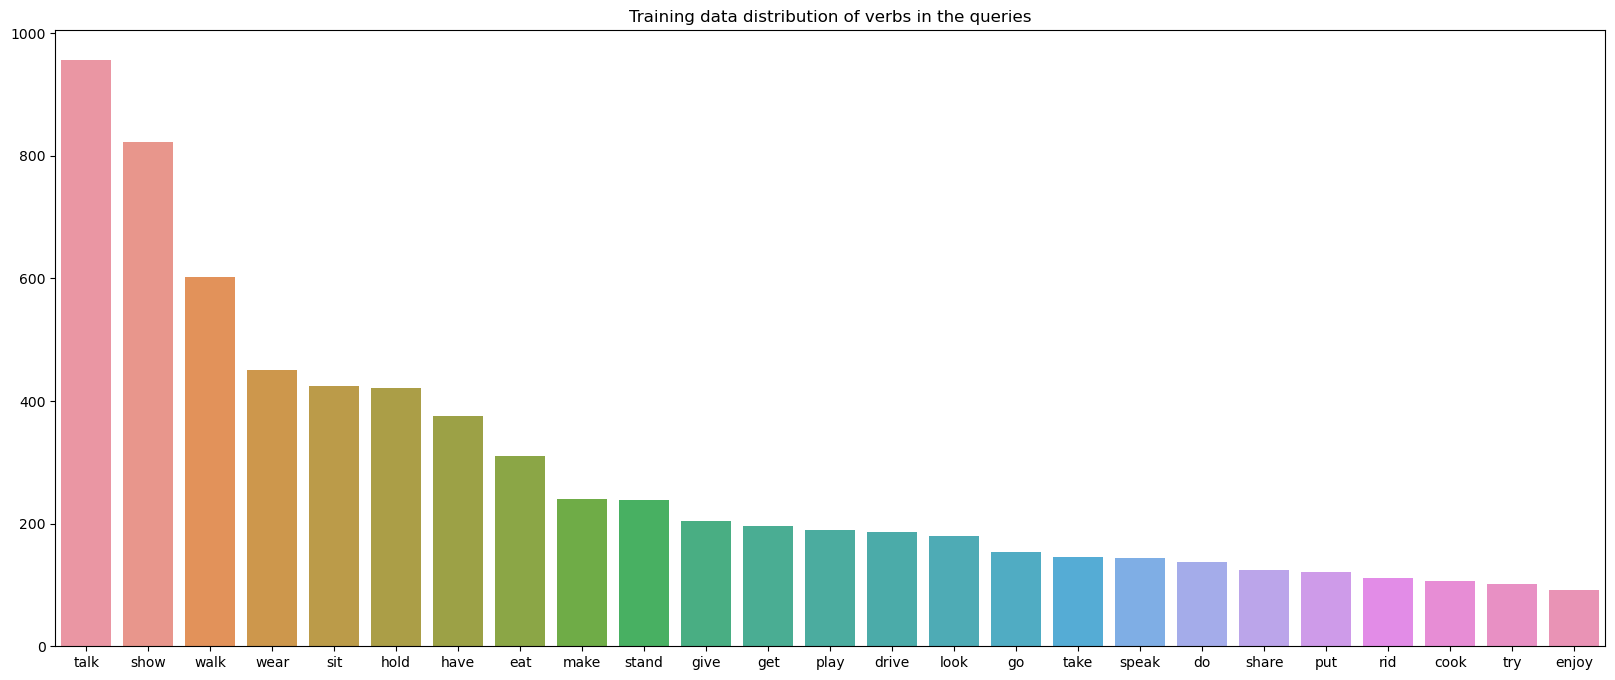

In [38]:
plt.figure(figsize=(20,8))
sns.barplot(x = list(top_25_verbs.keys()), y = list(top_25_verbs.values()))
plt.title("Training data distribution of verbs in the queries")
plt.show()

In [39]:
test_queries = test_df["query"]

In [40]:
# %%time 
# op_test = get_ner_tags(test_queries)

In [41]:
tot_verbs_test = []

for va in verbs_test:
    tot_verbs_test += va

In [42]:
# temp_collection_test  = Counter(tot_verbs_test)

# top_25_verbs_test = dict(temp_collection_test.most_common(50)[2:27])

In [43]:
lemmatizer = WordNetLemmatizer()

lemmatized_verbs_test = {}

verbs_counter_test = Counter(tot_verbs_test)
# Iterate through the verbs in the counter object
for verb, freq in verbs_counter_test.items():
    # Lemmatize the verb to its root form
    root_form = lemmatizer.lemmatize(verb, 'v')
    
    # Add the root form to the dictionary and update its frequency
    if root_form in lemmatized_verbs_test:
        lemmatized_verbs_test[root_form] += freq
    else:
        lemmatized_verbs_test[root_form] = freq

temp_collection_test = Counter(lemmatized_verbs_test)
top_25_verbs_test = dict(temp_collection_test.most_common(50)[1:26])

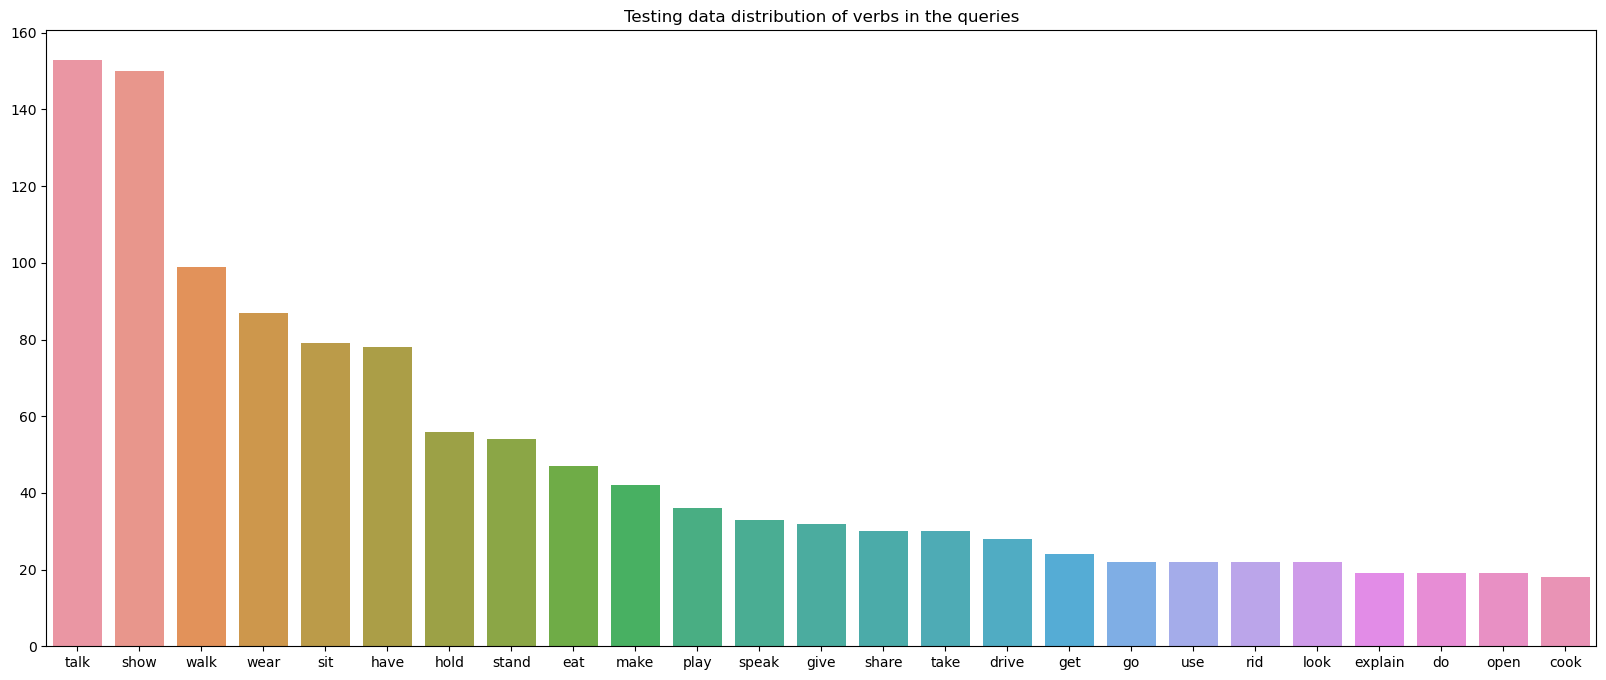

In [44]:
plt.figure(figsize=(20,8))
sns.barplot(x = list(top_25_verbs_test.keys()), y = list(top_25_verbs_test.values()))
plt.title("Testing data distribution of verbs in the queries")
plt.show()

In [45]:
# # op_test
# import pickle 

# with open("verbs_train", "wb") as fp:
#     pickle.dump(op, fp)

In [46]:
# import pickle 

# with open("verbs_test", "wb") as fp:
#     pickle.dump(op_test, fp)

In [47]:
# import pickle

# with open("verbs_train", "rb") as fp:
#     verbs_train = pickle.load(fp)


# with open("verbs_test", "rb") as fp:
#     verbs_test = pickle.load(fp)

## Are the temporal locations of the moments annotated biased towards any end? 

In [48]:
tv_df = pd.concat([train_df,val_df])

In [49]:
duration_tv = tv_df["duration"]

In [50]:
tv_df.iloc[110]["relevant_windows"]

# tv_df.iloc[0]["vid"]

[[0, 130]]

In [51]:
tv_df.columns

Index(['qid', 'query', 'duration', 'vid', 'relevant_clip_ids',
       'saliency_scores', 'relevant_windows'],
      dtype='object')

In [52]:
rel_windows_tv = tv_df["relevant_windows"]

In [53]:
for i in range(len(rel_windows_tv)):

    for j in range(len(rel_windows_tv.iloc[i])):

        curr_dur = duration_tv.iloc[i]

        rel_windows_tv.iloc[i][j][0] = rel_windows_tv.iloc[i][j][0]/curr_dur
        rel_windows_tv.iloc[i][j][1] = rel_windows_tv.iloc[i][j][1]/curr_dur



In [54]:
# rel_windows_tv


start_pts = []

for i in range(len(rel_windows_tv)):

    for j in range(len(rel_windows_tv.iloc[i])):
        start_pts.append(rel_windows_tv.iloc[i][j][0])


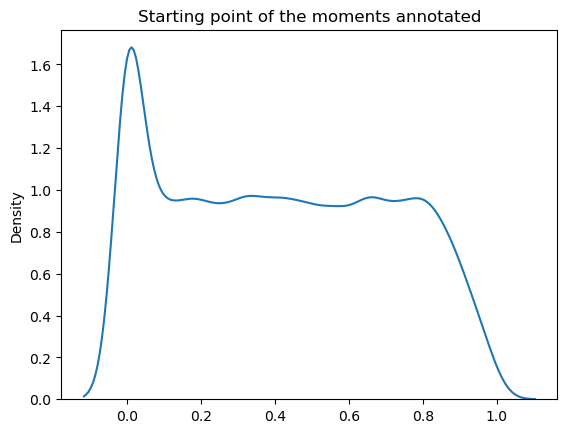

In [55]:
plt.title("Starting point of the moments annotated")
sns.kdeplot(start_pts)
plt.show()

/dgxa_home/se20uari147/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


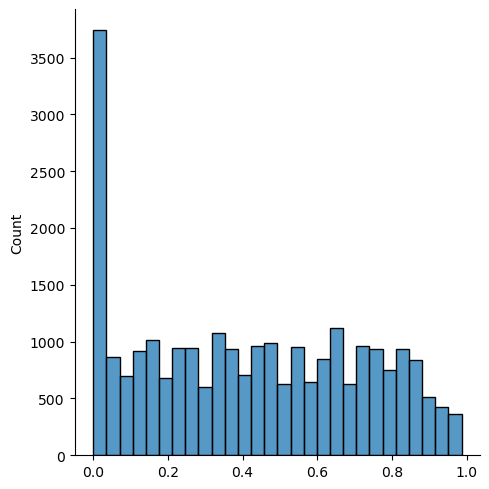

In [56]:
sns.displot(start_pts)
plt.show()

In [57]:
# start_pts

## Are the saliency scores from the 3 annotators biased? Let's check

In [58]:
df_saliency = tv_df["saliency_scores"]

In [59]:
import numpy as np

annot_scores = []
for i in range(len(df_saliency)):

    curr_scores = np.array([0,0,0])
    for j in range(len(df_saliency.iloc[i])):
        curr_scores += np.array(df_saliency.iloc[i][j])

    curr_scores = curr_scores/len(df_saliency.iloc[i])

    annot_scores.append(curr_scores)

annot_scores = np.array(annot_scores)



In [60]:
annot_scores.shape

(14436, 3)

In [61]:
annot_scores[:,0].shape
annot_scores[:,1].shape
annot_scores[:,2].shape


(14436,)

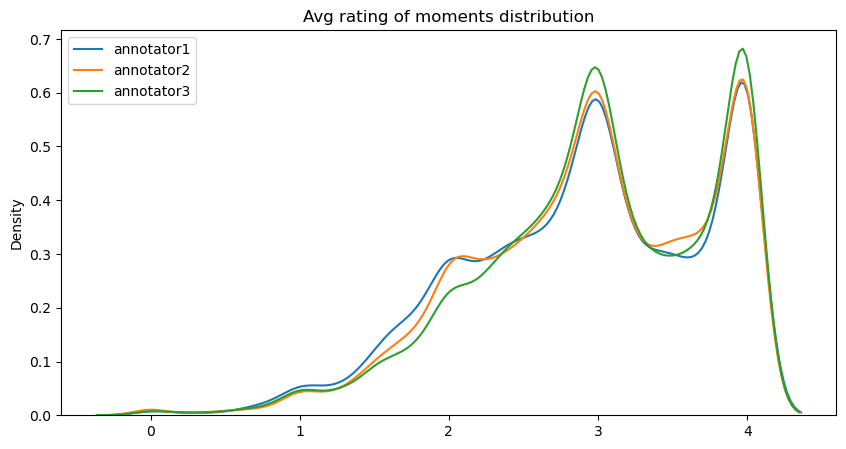

In [62]:
plt.figure(figsize=(10,5))
plt.title("Avg rating of moments distribution")
sns.kdeplot(annot_scores[:,0])
sns.kdeplot(annot_scores[:,1])
sns.kdeplot(annot_scores[:,2])
plt.legend(["annotator1","annotator2","annotator3"])
plt.show()

In [63]:
annot_scores[:,0].mean(), annot_scores[:,1].mean(), annot_scores[:,2].mean()

(2.9123046635049112, 2.9490202695650756, 2.985855899765805)

### We can see that, annotator 3 rated the videos with a little bit higher saliency scores than the others

In [64]:
# verbs_train_ing = []

# for arr in verbs_train:
#     tempop = []
#     for ele in arr:
#         if ele not in ("is","have","was","are","they","been"):
#             tempop.append(ele)
#     verbs_train_ing.append(tempop)

## Analysing the labels for those queries where the moments are found in the starting.

In [65]:
zero_ind = []

for i in range(len(rel_windows_tv)):
    for j in range(len(rel_windows_tv.iloc[i])):

        if rel_windows_tv.iloc[i][j][0] == 0:
            zero_ind.append(i)

In [66]:
len(verbs_train), len(zero_ind)

(8768, 3084)

In [67]:
zero_time_queries = list(tv_queries.iloc[zero_ind])


In [68]:
# zero_ind
# zero_time_queries
root_form = lemmatizer.lemmatize(verb, 'v')

In [69]:
verbs_zero = []

for i in range(len(verbs_train)):
    if i in zero_ind:
        verbs_zero.append(verbs_train[i])

In [70]:
verbs_zero_lemma = []

root_form = lemmatizer.lemmatize(verb, 'v')

for i in range(len(verbs_zero)):
    
    for v in verbs_zero[i]:
        verbs_zero_lemma.append(lemmatizer.lemmatize(v, 'v'))


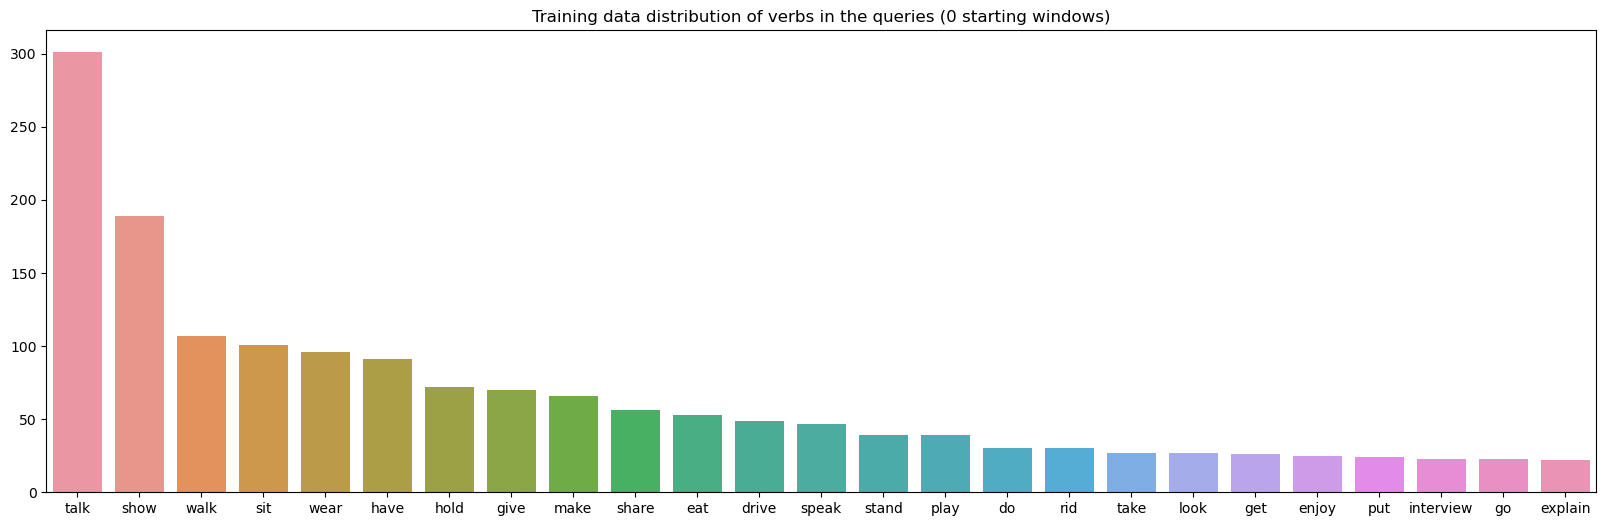

In [71]:
temp_collection_zero  = Counter(verbs_zero_lemma)

top_50_verbs_0 = dict(temp_collection_zero.most_common(50)[1:26])

# del top_50_verbs_0["is"]
# del top_50_verbs_0["are"]

plt.figure(figsize=(20,6))
sns.barplot(x = list(top_50_verbs_0.keys()), y = list(top_50_verbs_0.values()))
plt.title("Training data distribution of verbs in the queries (0 starting windows)")
plt.show()


In [72]:
# len(top_25_verbs)

[]

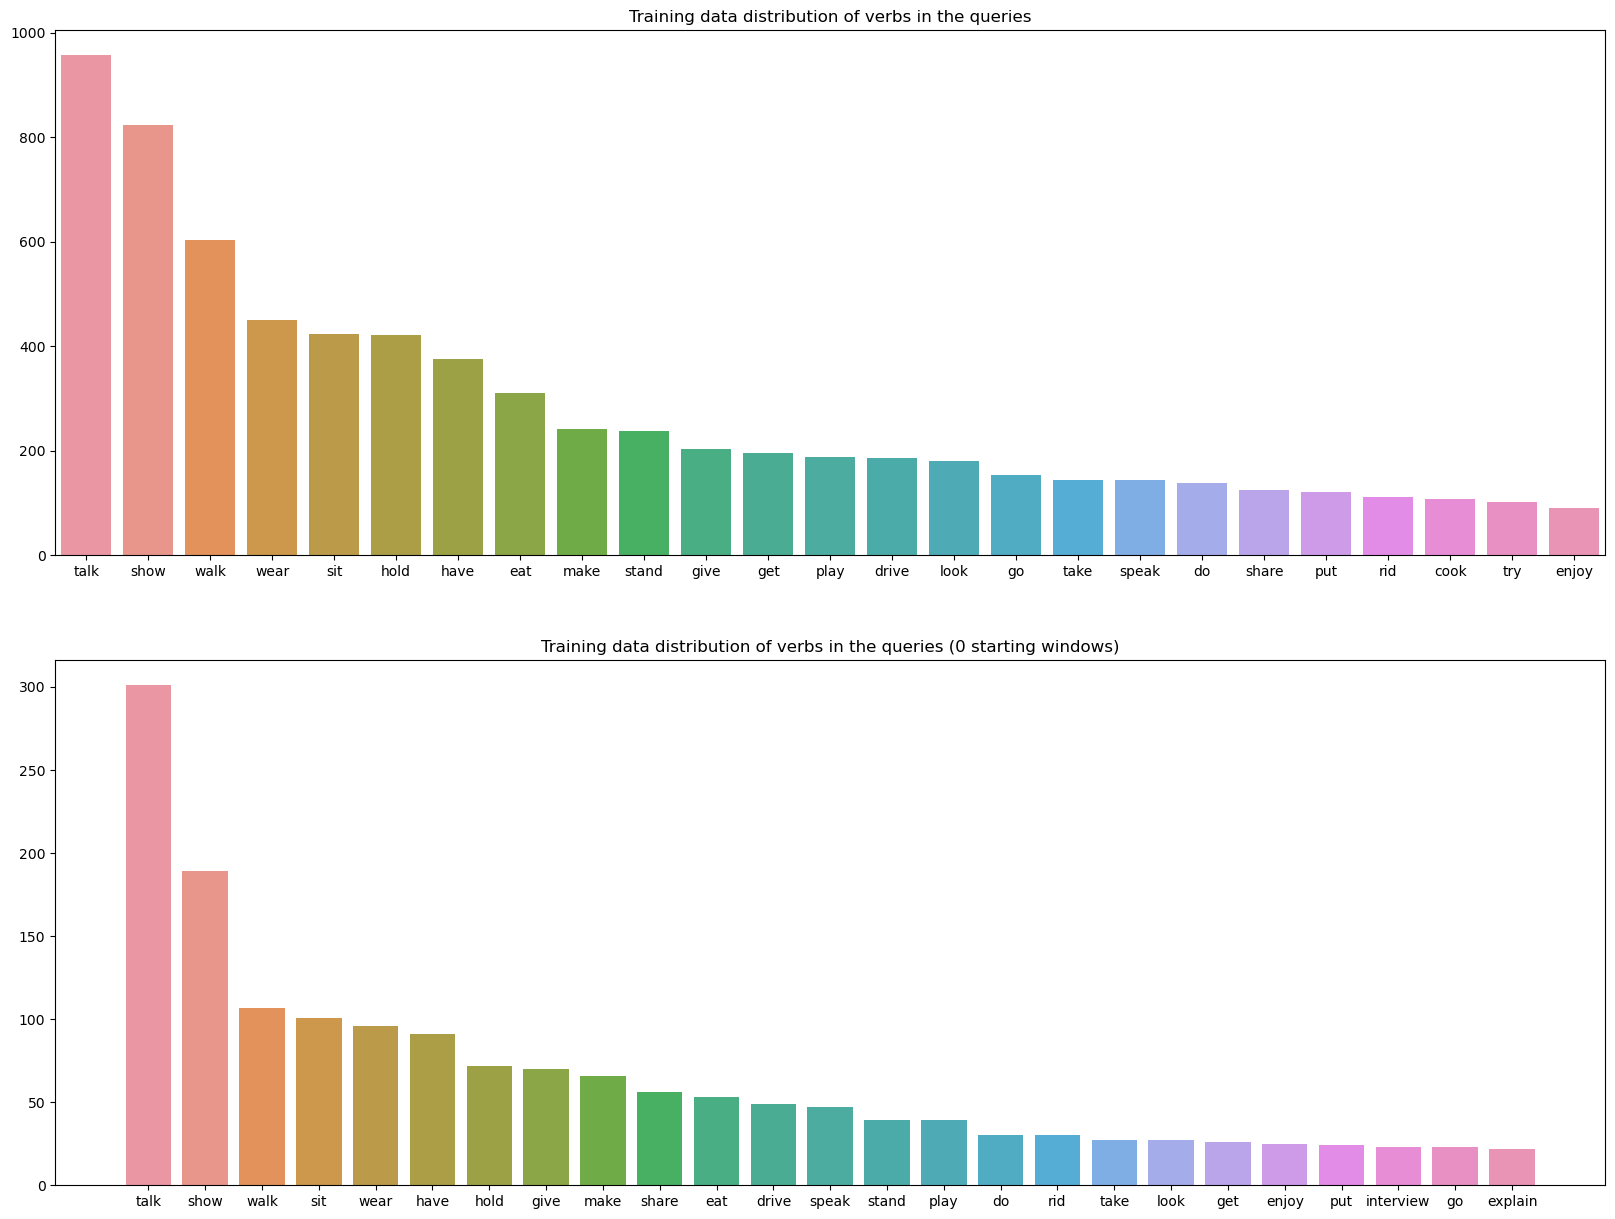

In [73]:
plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
sns.barplot(x = list(top_25_verbs.keys()), y = list(top_25_verbs.values()))
plt.title("Training data distribution of verbs in the queries")

plt.subplot(2,1,2)
sns.barplot(x = list(top_50_verbs_0.keys()), y = list(top_50_verbs_0.values()))
plt.title("Training data distribution of verbs in the queries (0 starting windows)")
           
plt.plot()


# TALK, SHOW is biased with the 0-context videos 

In [74]:
max(top_25_verbs.values()), max(top_50_verbs_0.values())

(957, 301)

In [75]:
# top_25_verbs
100*top_25_verbs["talk"]/(sum(top_25_verbs.values())) , 100*top_50_verbs_0["talk"]/(sum(top_50_verbs_0.values()))

(13.597612958226769, 18.432333129210043)

#### There "talk" verb is more frequent in those videos where the moments are labelled at the start

In [114]:
100*top_25_verbs["show"]/(sum(top_25_verbs.values())) , 100*top_50_verbs_0["show"]/(sum(top_50_verbs_0.values()))

(11.693662972435352, 11.57379056950398)

In [76]:
import matplotlib as mpl
from typing import List
import json
from multiprocessing import Pool
import numpy as np
import spacy
import matplotlib.pyplot as plt
# from src.toolbox.utils import sentence2token, _load_top_actions
# from src.toolbox.eval import evaluate, accumulate_metrics
# from src.toolbox.visualization import plot_performance_per_duration
# from src.toolbox.data_converters import ActivityNetCap2Instances
# from src.toolbox.baseline import SegmentGeneratorKDE, predict
import seaborn as sns
sns.set_style("white")

from typing import List, Tuple
import numpy as np
import spacy
from typing import Tuple, List, Dict, Callable
from pandas import DataFrame



In [77]:

def QVHighlights(raw_data):
    
    instances = []
    
    for i in range(len(raw_data)):
        
        query = raw_data.iloc[i]["query"]
        
        
        
        for sentence, timestamp in zip(anno["sentences"], anno["timestamps"]):
            query = (video_id, sentence)
            location = (*timestamp, anno["duration"])
            instance = (query, location)
            instances.append(instance)
    return instances




In [78]:
os.getcwd()

'/dgxa_home/se20uari147/MHDETR'

In [79]:
os.listdir("features")
os.path.join("/dgxa_home/se20uari147/MHDETR/features","clip_text_features")

'/dgxa_home/se20uari147/MHDETR/features/clip_text_features'

In [80]:
len(os.listdir(os.path.join("/dgxa_home/se20uari147/MHDETR/features","clip_text_features")))

10311

In [81]:
train_df1 = pd.read_json("/dgxa_home/se20uari147/MHDETR/data/highlight_train_release.jsonl", lines = True)
val_df1 = pd.read_json("/dgxa_home/se20uari147/MHDETR/data/highlight_val_release.jsonl", lines = True)

tv_df1 = pd.concat([train_df1,val_df1])

In [82]:
text_features_tv = []

In [83]:
for i in range(len(tv_df1)):
    
    qid = tv_df1.iloc[i]["qid"]
    
    fp = os.path.join("/dgxa_home/se20uari147/MHDETR/features/clip_text_features", "qid"+str(qid)+".npz")
    
    with np.load(fp) as data:
        # print(data)
        
        text_features_tv.append(data["pooler_output"])
        # print(data["pooler_output"].shape, data["last_hidden_state"].shape, type(data["pooler_output"]))
        # break
    
    

In [84]:
# os.path.join("/dgxa_home/se20uari147/MHDETR/features","clip_text_features")

In [85]:
# os.listdir(os.path.join("/dgxa_home/se20uari147/MHDETR/features","clip_text_features"))

In [86]:
text_features_tv = np.array(text_features_tv)

In [87]:
text_features_tv.shape

(8768, 512)

In [88]:
tv_df1.shape

(8768, 7)

In [89]:
# text_features_tv

In [90]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

/dgxa_home/se20uari147/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Fit 2 clusters
Fit 4 clusters


/dgxa_home/se20uari147/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/dgxa_home/se20uari147/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Fit 6 clusters
Fit 8 clusters


/dgxa_home/se20uari147/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/dgxa_home/se20uari147/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Fit 10 clusters
Fit 12 clusters


/dgxa_home/se20uari147/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/dgxa_home/se20uari147/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Fit 14 clusters
Fit 16 clusters


/dgxa_home/se20uari147/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/dgxa_home/se20uari147/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Fit 18 clusters
Fit 20 clusters


/dgxa_home/se20uari147/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/dgxa_home/se20uari147/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Fit 22 clusters
Fit 24 clusters


/dgxa_home/se20uari147/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/dgxa_home/se20uari147/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Fit 26 clusters
Fit 28 clusters


/dgxa_home/se20uari147/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/dgxa_home/se20uari147/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Fit 30 clusters


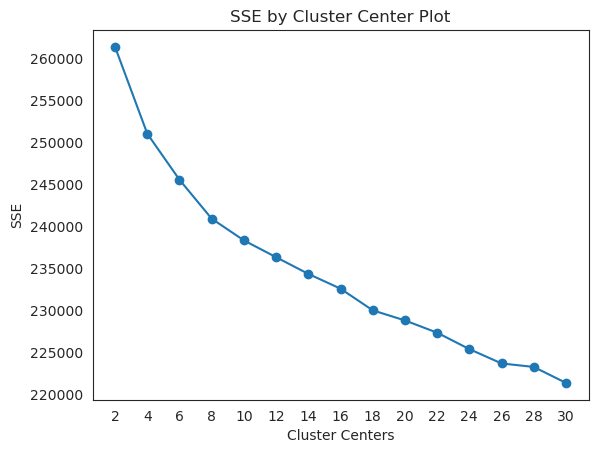

In [91]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=512, batch_size=1024, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
        
    
        
    f = plt.figure()
    plt.plot(iters, sse, marker='o')
    plt.xlabel('Cluster Centers')
    plt.xticks(iters)
    plt.ylabel('SSE')
    plt.title('SSE by Cluster Center Plot')
    plt.show()


find_optimal_clusters(text_features_tv, 30)

In [92]:
clusters10 = MiniBatchKMeans(n_clusters=10, init_size=512, batch_size=1024, random_state=20).fit_predict(text_features_tv)


/dgxa_home/se20uari147/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


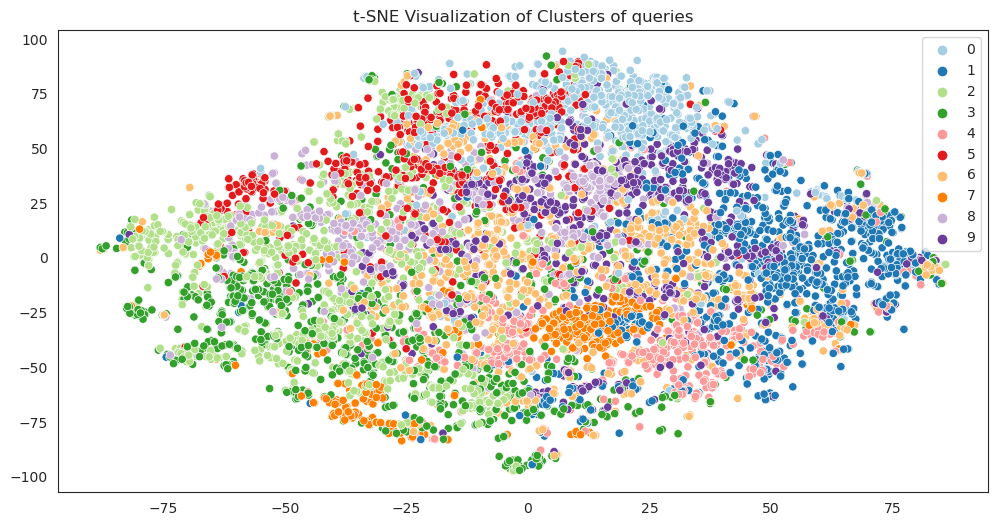

In [93]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=20)
tsne_result = tsne.fit_transform(text_features_tv)

# Create a scatter plot for t-SNE
plt.figure(figsize = (12,6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=clusters10, palette="Paired")
plt.title("t-SNE Visualization of Clusters of queries")
plt.show()

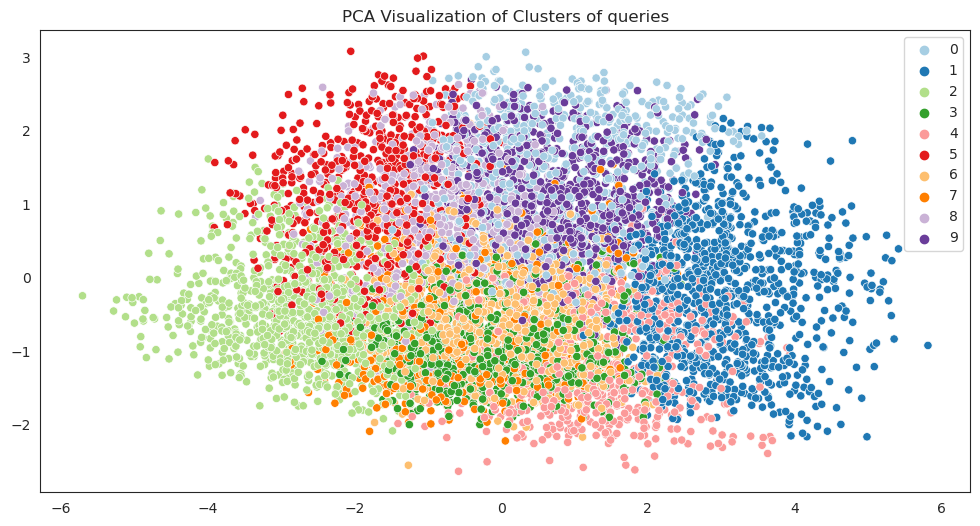

In [94]:
# Perform PCA
pca = PCA(n_components=2, random_state=20)
pca_result = pca.fit_transform(text_features_tv)

# Create a scatter plot for PCA
plt.figure(figsize = (12,6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1] ,hue=clusters10, palette="Paired")
plt.title("PCA Visualization of Clusters of queries")
plt.show()

# Few queries out of 8k

In [95]:
# zero_ind
zero_ind_q = tv_df.iloc[zero_ind]

In [96]:
zero_ind_q.index

Index([  12,   20,   21,   22,   23,   28,   30,   31,   32,   33,
       ...
       7148, 7149, 7162, 7166, 7167, 7168, 7172, 7185, 7198, 7215],
      dtype='int64', length=3084)

In [97]:
isstart = []

for i in range(len(text_features_tv)):
    
    if i in list(zero_ind_q.index):
        isstart.append(1)
        
    else:
        isstart.append(0)
        

In [98]:
sum(isstart)

1542

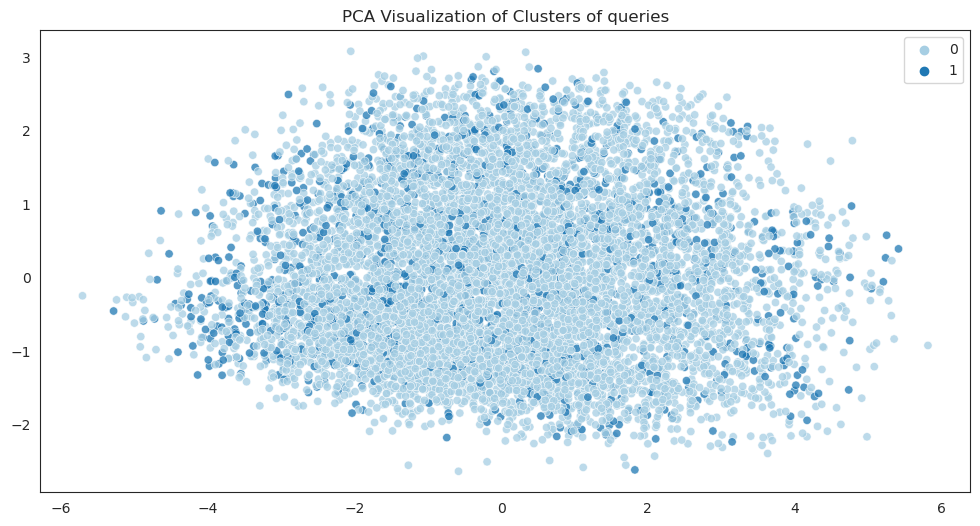

In [99]:
# len(isstart)

plt.figure(figsize = (12,6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1] ,hue=isstart, palette="Paired",alpha = 0.75)
plt.title("PCA Visualization of Clusters of queries")
plt.show()

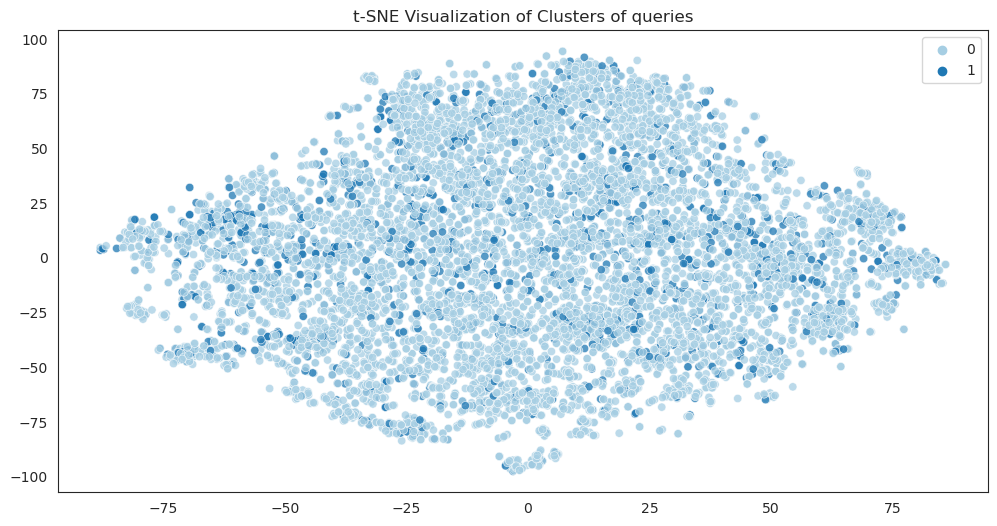

In [100]:
plt.figure(figsize = (12,6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=isstart, palette="Paired", alpha = 0.75)
plt.title("t-SNE Visualization of Clusters of queries")
plt.show()

In [101]:
# %load_ext memory_profiler
import psutil

process = psutil.Process(os.getpid())
print(process.memory_info().rss)
print(process.memory_info().rss/1e+9, "GB")

3580534784
3.580534784 GB


In [102]:
video_features_tv = []

In [103]:
tv_df1

,qid,query,duration,vid,relevant_clip_ids,saliency_scores,relevant_windows
0,9769,some military patriots takes us through their ...,150,j7rJstUseKg_360.0_510.0,"[36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 48, 4...","[[4, 3, 2], [4, 1, 3], [4, 3, 4], [4, 1, 2], [...","[[72, 82], [84, 94], [96, 106], [108, 118], [1..."
1,10016,Man in baseball cap eats before doing his inte...,150,j7rJstUseKg_210.0_360.0,"[48, 49, 50, 51, 52, 53, 54, 55, 56]","[[2, 3, 3], [4, 3, 2], [2, 3, 1], [2, 3, 0], [...","[[96, 114]]"
2,10078,A man in a white shirt discusses the right to ...,150,j7rJstUseKg_60.0_210.0,"[24, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 4...","[[0, 2, 1], [0, 1, 1], [0, 1, 1], [0, 1, 1], [...","[[48, 50], [76, 120], [122, 138], [140, 146]]"
3,6812,A view of a bamboo fountain of water in a tea ...,150,-Oc6gSWB_HA_60.0_210.0,"[32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 4...","[[4, 2, 3], [3, 3, 3], [4, 3, 3], [4, 2, 3], [...","[[64, 92]]"
4,9247,The weather map shows large snowfall in the we...,150,G60-kHBEeZA_60.0_210.0,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...","[[2, 4, 2], [3, 4, 2], [3, 4, 2], [2, 4, 2], [...","[[14, 48]]"
...,...,...,...,...,...,...,...
1545,1761,A woman showing some vegetables and fruits ins...,150,_e8_yuedv6w_60.0_210.0,"[32, 33, 34, 38, 39, 40, 41, 42, 43, 44, 45, 4...","[[4, 4, 4], [4, 4, 4], [4, 4, 4], [4, 4, 4], [...","[[64, 70], [76, 110], [120, 130]]"
1546,3992,Hand shows different foods on the table.,150,_e8_yuedv6w_210.0_360.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[4, 3, 2], [4, 4, 2], [4, 4, 2], [4, 4, 2], [...","[[0, 32], [36, 64]]"
1547,6222,A white plate has different fruits and vegetab...,150,_e8_yuedv6w_360.0_510.0,"[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 6...","[[3, 4, 3], [3, 4, 3], [3, 4, 3], [3, 4, 3], [...","[[114, 138], [140, 150]]"
1548,7123,A woman is making a type of green smoothie in ...,150,_e8_yuedv6w_510.0_660.0,"[13, 14, 15, 16, 17, 18, 19]","[[3, 4, 4], [2, 4, 4], [1, 4, 4], [0, 4, 4], [...","[[26, 40]]"


In [104]:
for i in range(len(tv_df1)):
    
    vid = tv_df1.iloc[i]["vid"]
    
    fp = os.path.join("/dgxa_home/se20uari147/MHDETR/features/clip_features", vid +".npz")
    
    with np.load(fp) as data:
        video_features_tv.append(data["features"])
        
    

In [116]:
len(video_features_tv), len(text_features_tv)

(8768, 8768)

In [129]:
from numpy import dot
from numpy.linalg import norm



def get_consine_sim_dist(video_features_tv, text_features_tv):
    
    op = []
    for i in range(len(text_features_tv)):
        
        sample_vid_f = video_features_tv[i]
        
        sample_txt_f = text_features_tv[i]
        
        temp_sim = []
        
        for j in range(len(sample_vid_f)):

            frame_vf = sample_vid_f[j]

            cos_sim = dot(sample_txt_f, frame_vf)/(norm(sample_txt_f)*norm(frame_vf))

            temp_sim.append(cos_sim)
            
        op.append(temp_sim)
        
    return op
            
            


In [130]:
cosine_dist = get_consine_sim_dist(video_features_tv, text_features_tv)

In [131]:
len(cosine_dist)

8768

In [132]:
len(cosine_dist[0]), len(cosine_dist[1]), len(cosine_dist[30])

(75, 75, 75)

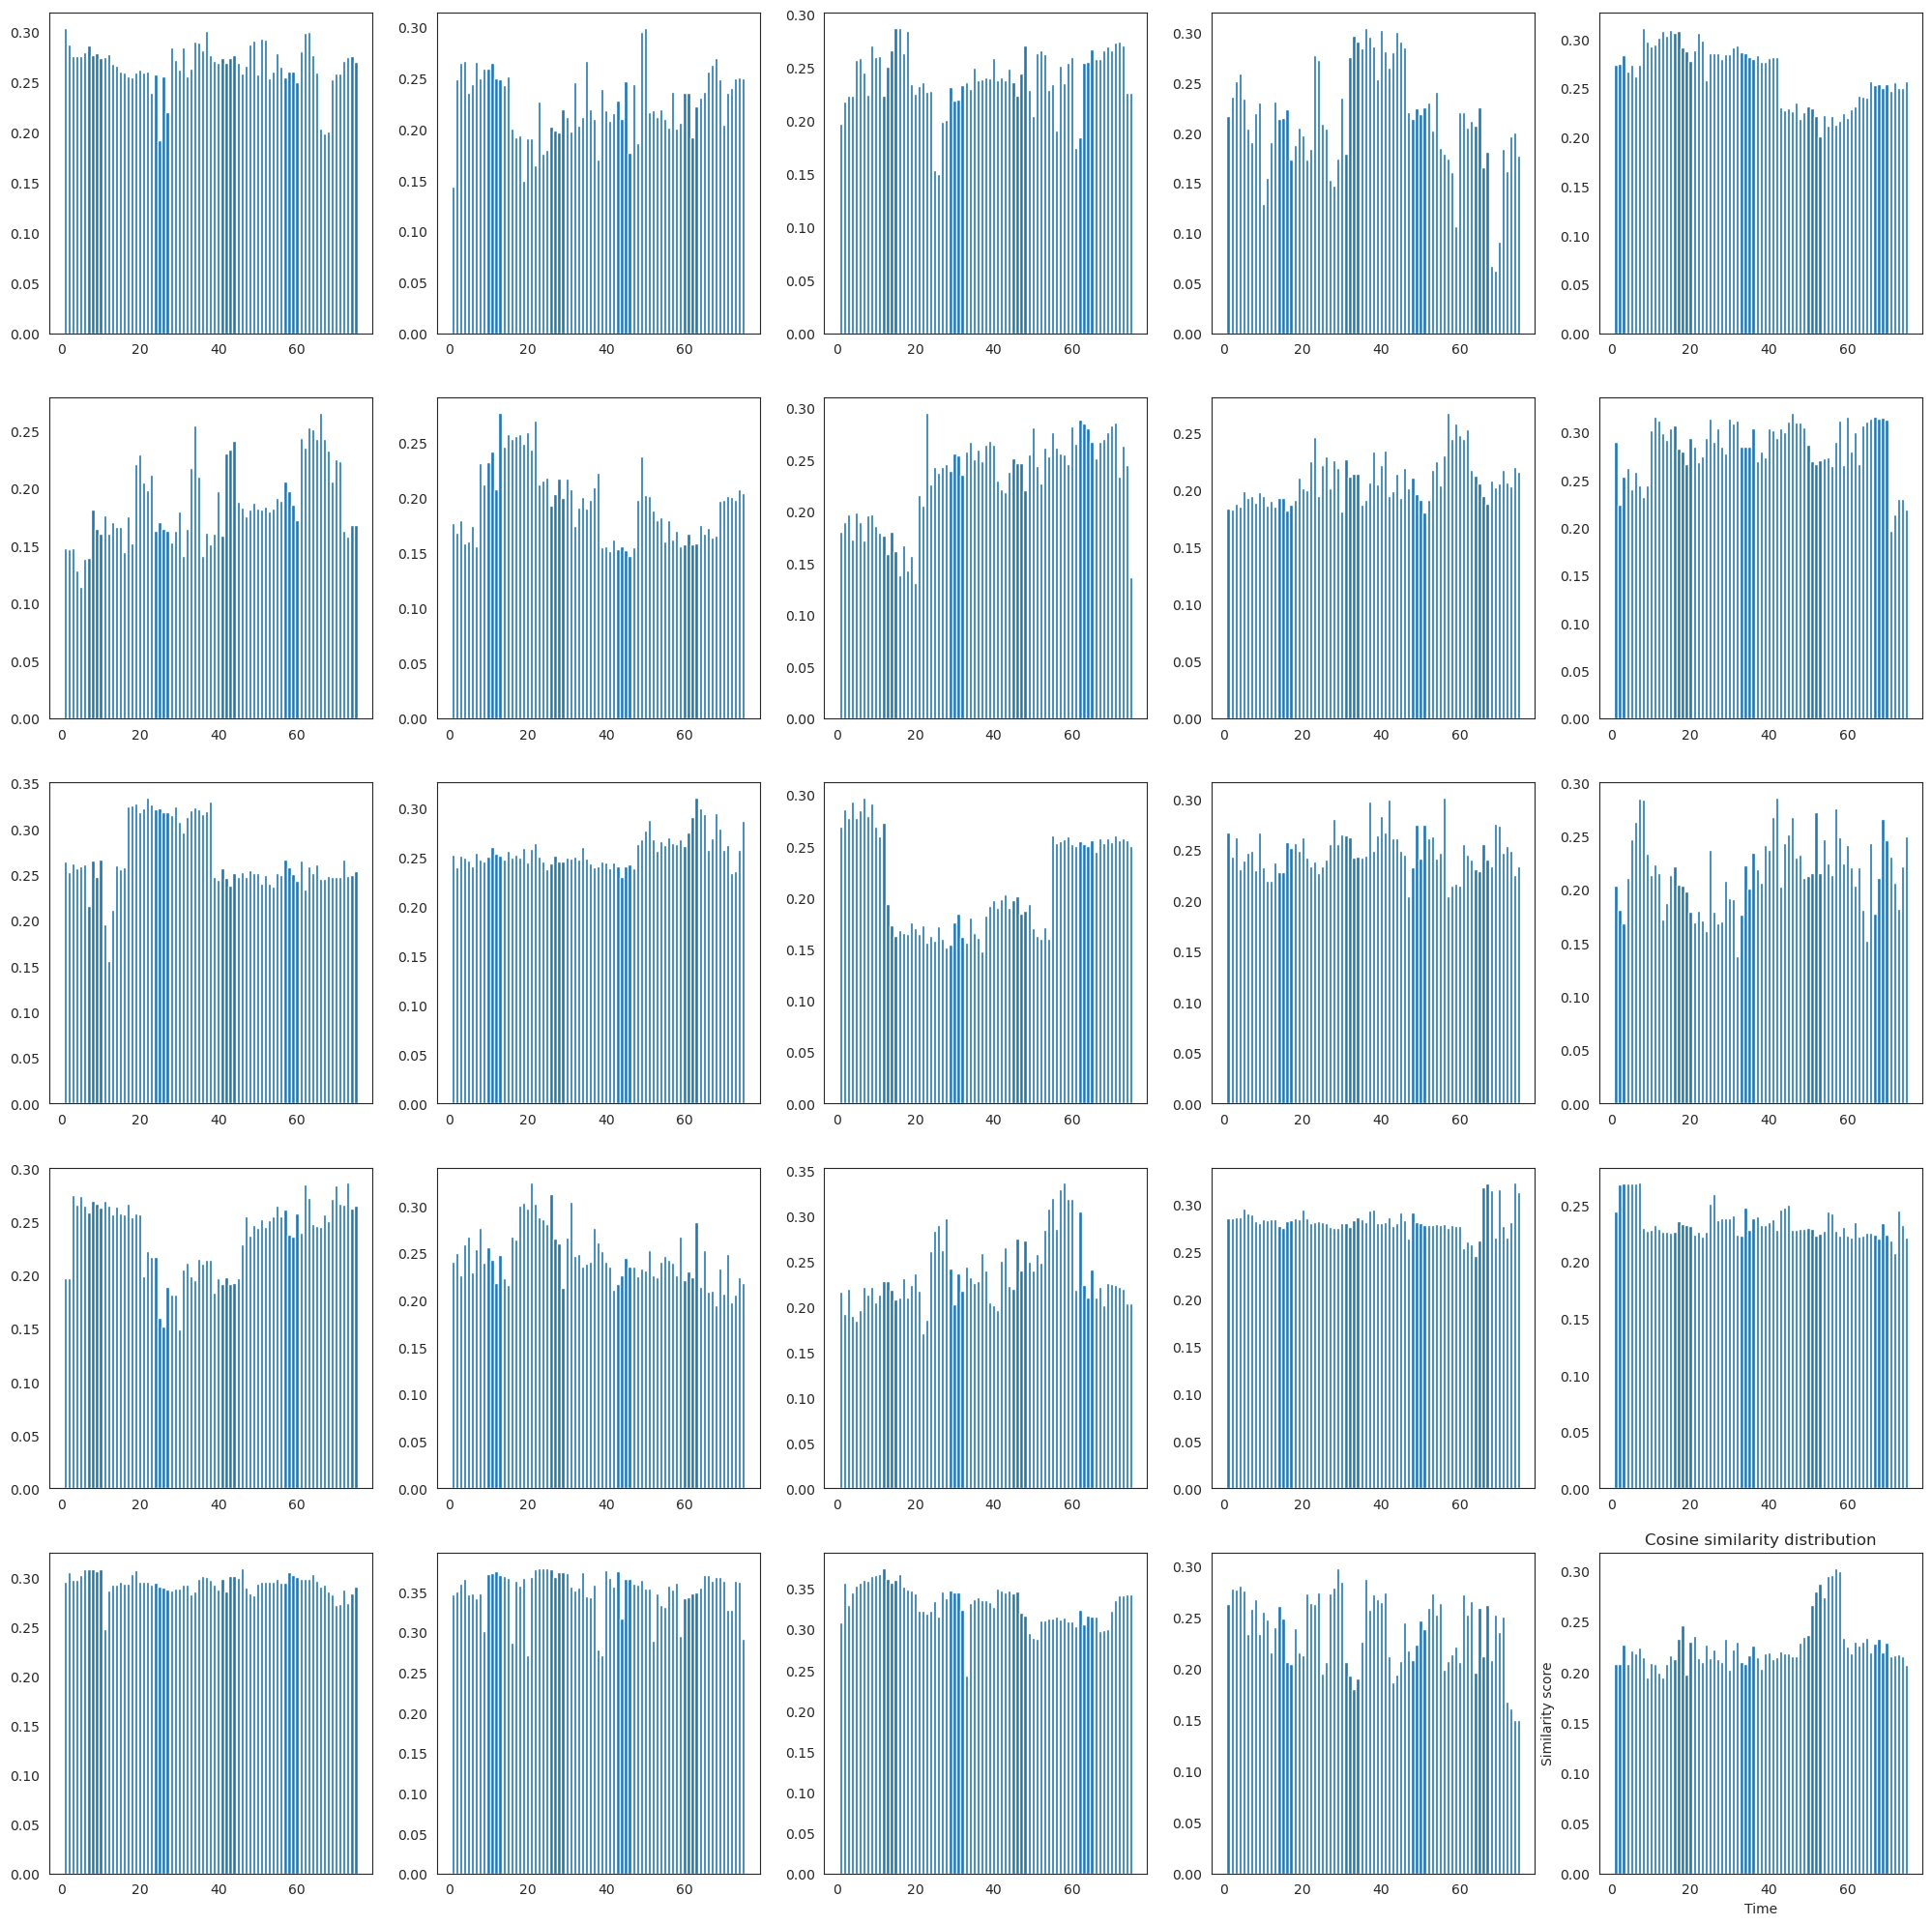

In [137]:
plt.figure(figsize=(25,25))

for i in range(25):
    
    temp_sim = cosine_dist[i]
    
    plt.subplot(5,5,i+1)
    plt.bar([i for i in range(1,len(temp_sim)+1)], temp_sim)
    

plt.xlabel('Time')
plt.ylabel('Similarity score')
plt.title('Cosine similarity distribution')
plt.show()

In [139]:
len(cosine_dist)

8768

In [155]:
cos_mean = []

for i in range(len(cosine_dist)):
    cos_mean.append(sum(cosine_dist[i])/(len(cosine_dist[i])))

/dgxa_home/se20uari147/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


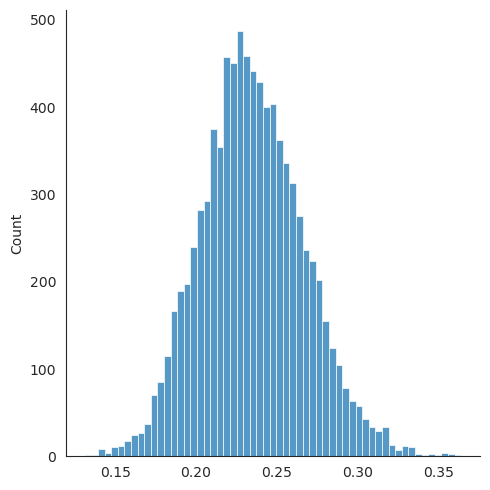

In [156]:
sns.displot(cos_mean)

In [157]:
len(cosine_dist), len(cos_mean)

(8768, 8768)

In [162]:
cos_std = []

for i in range(len(cosine_dist)):
    
    temp_var = 0
    for j in range(len(cosine_dist[i])):
    
        temp_var += (cosine_dist[i][j] - cos_mean[i])**2
    temp_var = (temp_var/len(cosine_dist[i]))**0.5
    
    cos_std.append(temp_var)

/dgxa_home/se20uari147/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


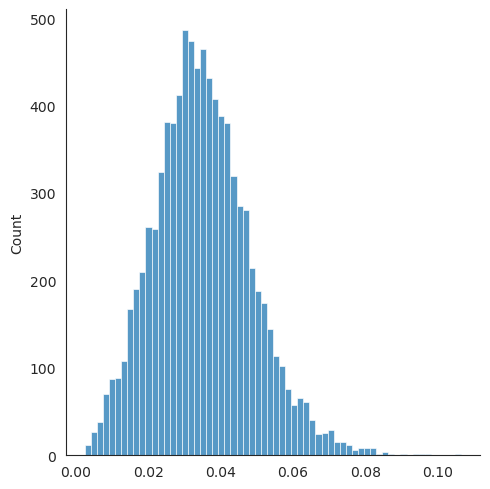

In [163]:
sns.displot(cos_std)

In [147]:
high_dist = []

for i in range(len(cosine_dist)):
    
    cos_mean = (sum(cosine_dist[i])/(len(cosine_dist[i])))
    
    if cos_mean >= 0.3:
        high_dist.append(cosine_dist[i])

In [149]:
len(high_dist)

228

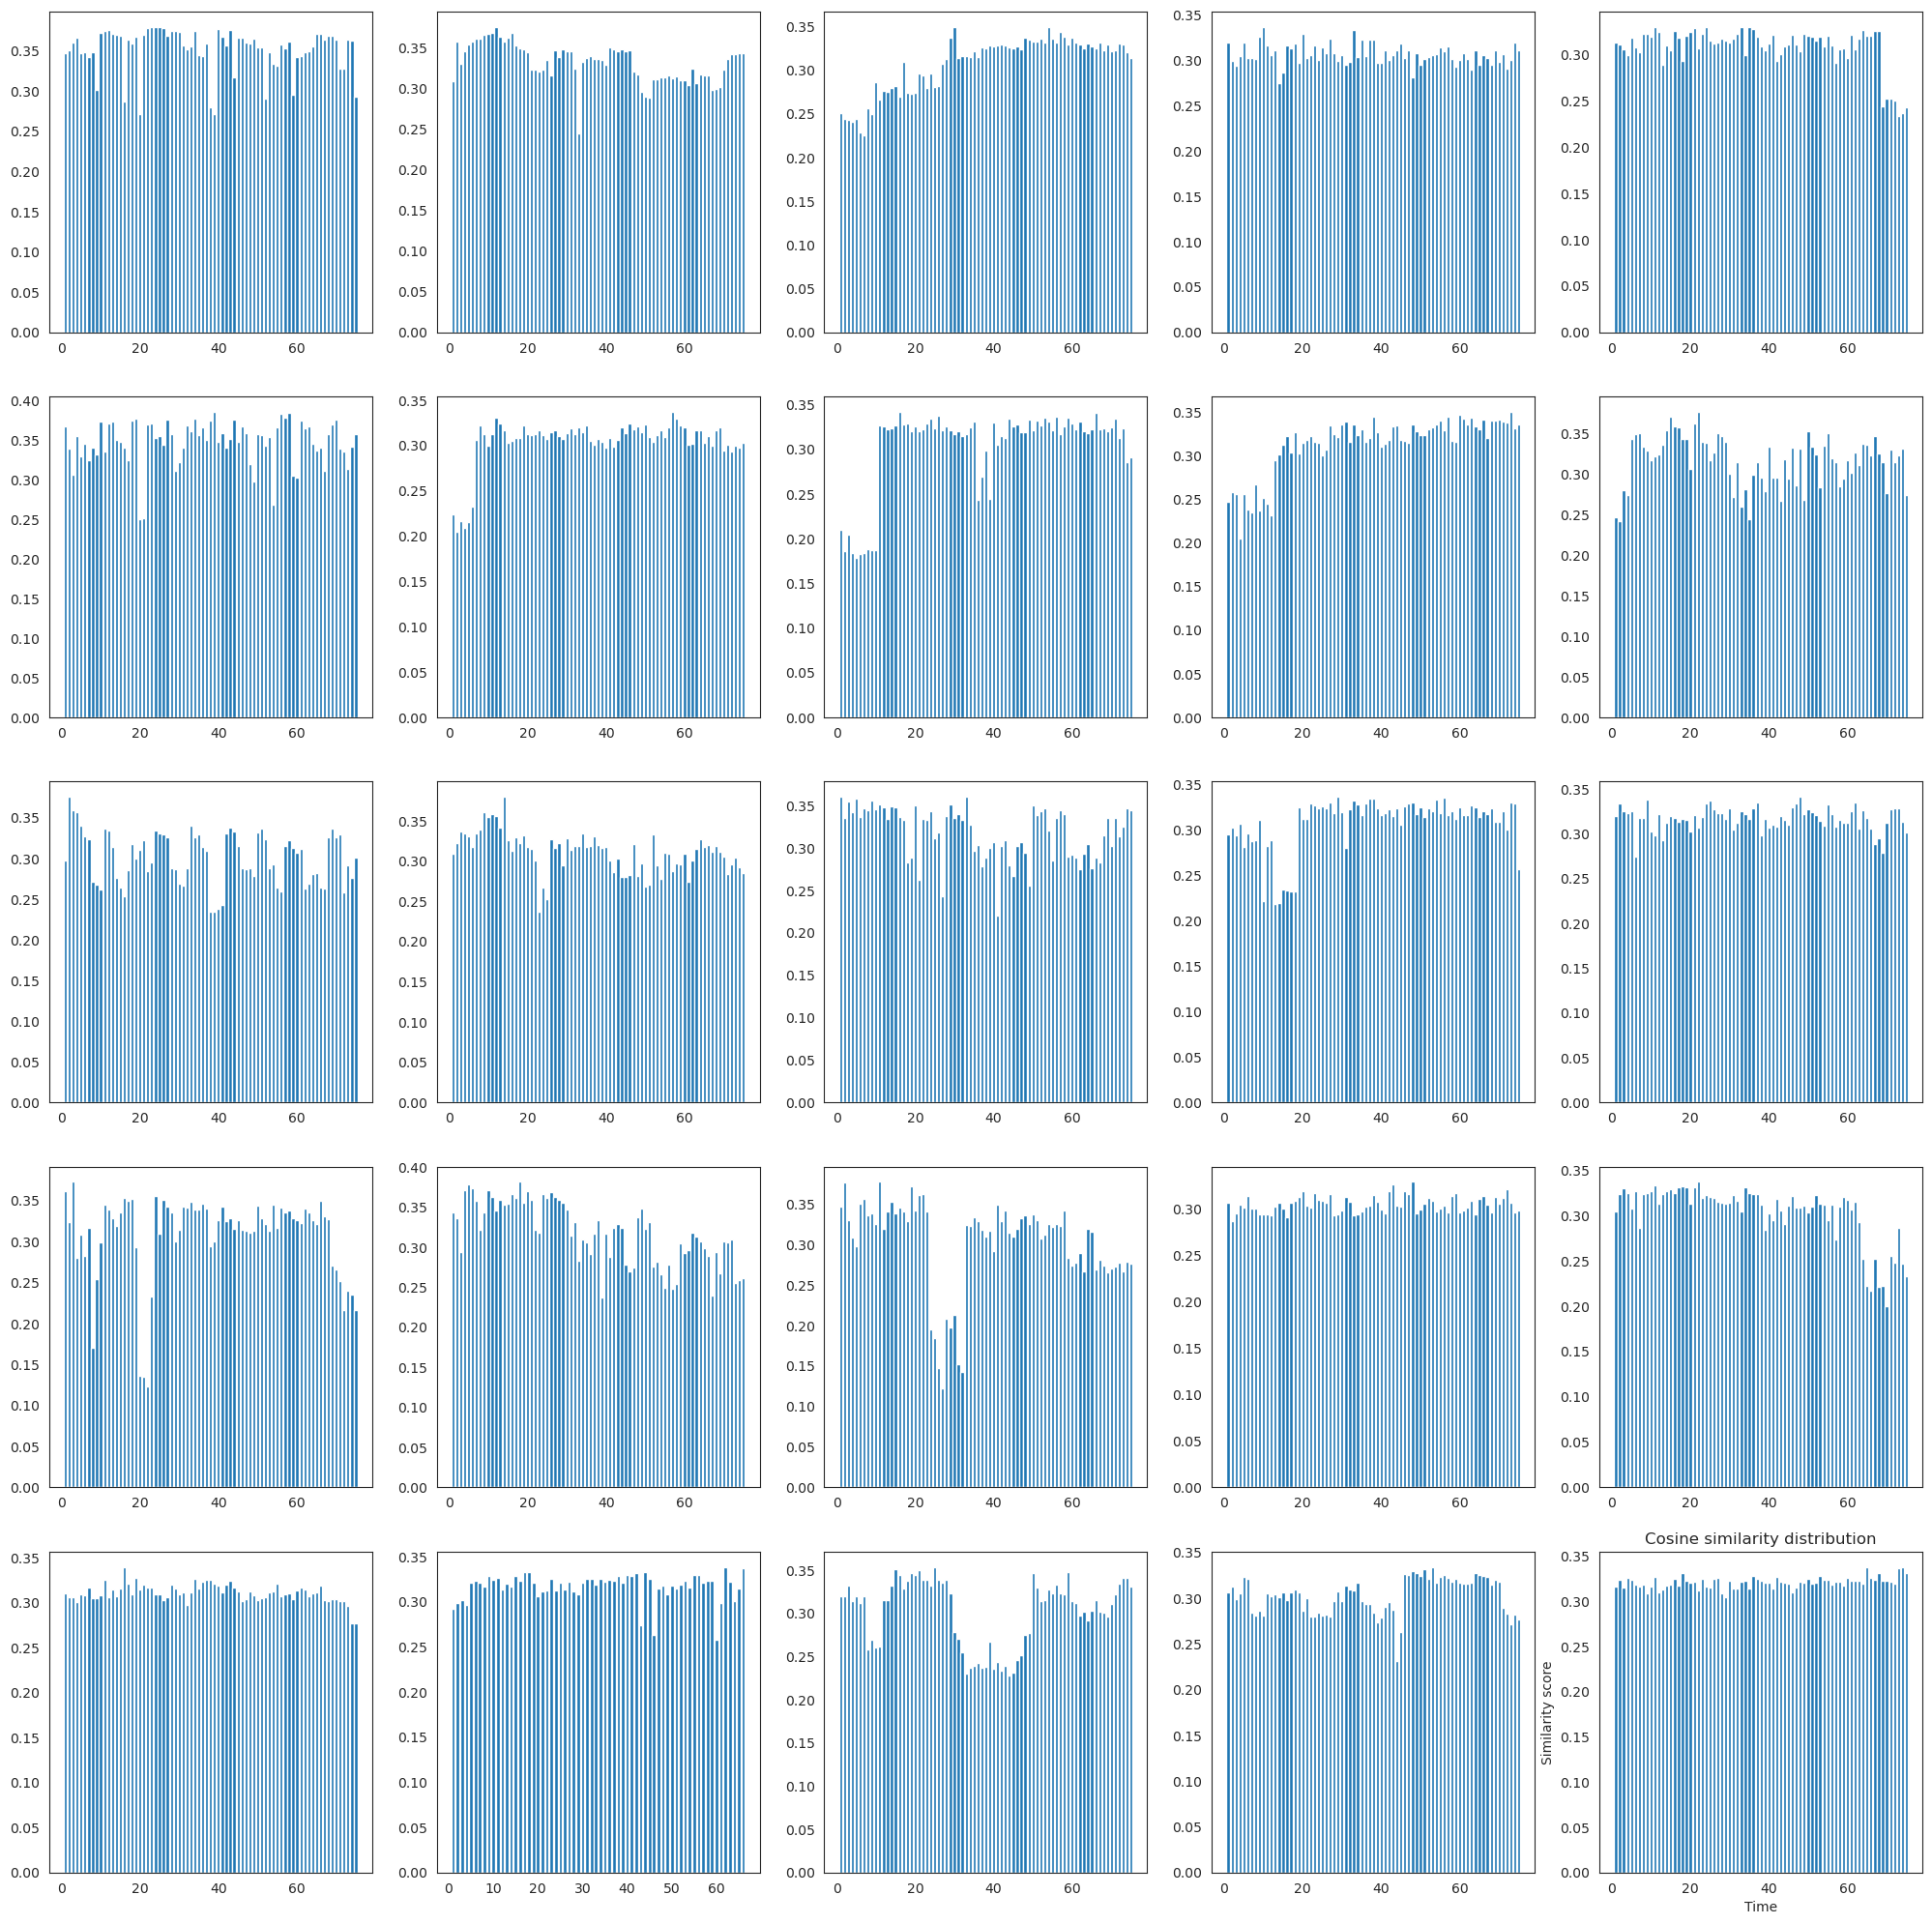

In [150]:
plt.figure(figsize=(25,25))

for i in range(25):
    
    temp_sim = high_dist[i]
    
    plt.subplot(5,5,i+1)
    plt.bar([i for i in range(1,len(temp_sim)+1)], temp_sim)
    

plt.xlabel('Time')
plt.ylabel('Similarity score')
plt.title('Cosine similarity distribution')
plt.show()

In [105]:
sample_vid_f = video_features_tv[0]
sample_txt_f = text_features_tv[0]

In [106]:
sample_txt_f.shape, sample_vid_f.shape

((512,), (75, 512))

In [107]:
from numpy import dot
from numpy.linalg import norm

temp_sim = []

for i in range(len(sample_vid_f)):
    
    frame_vf = sample_vid_f[i]
    
    cos_sim = dot(sample_txt_f, frame_vf)/(norm(sample_txt_f)*norm(frame_vf))
    
    temp_sim.append(cos_sim)
    
    

In [108]:
len(temp_sim)

75

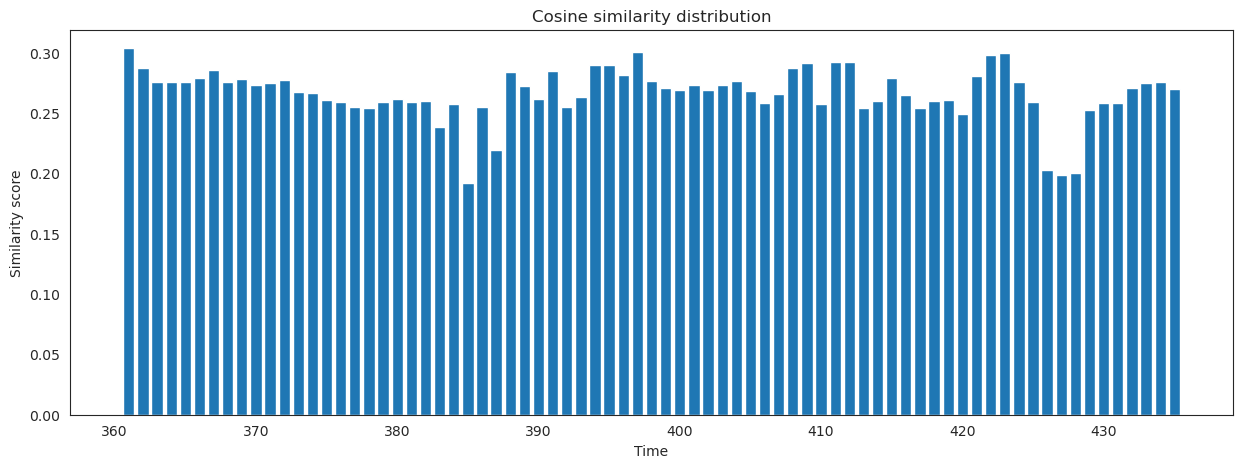

In [109]:
# temp_sim
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
# Create a bar plot
plt.bar([360+i for i in range(1,len(temp_sim)+1)], temp_sim)

# Add labels and a title
plt.xlabel('Time')
plt.ylabel('Similarity score')
plt.title('Cosine similarity distribution')

# Show the plot
plt.show()


In [110]:
tv_df1.iloc[0]["relevant_windows"]

[[72, 82], [84, 94], [96, 106], [108, 118], [120, 130], [136, 142], [144, 146]]

In [111]:
tv_df1.iloc[0]

qid                                                               9769
query                some military patriots takes us through their ...
duration                                                           150
vid                                            j7rJstUseKg_360.0_510.0
relevant_clip_ids    [36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 48, 4...
saliency_scores      [[4, 3, 2], [4, 1, 3], [4, 3, 4], [4, 1, 2], [...
relevant_windows     [[72, 82], [84, 94], [96, 106], [108, 118], [1...
Name: 0, dtype: object

In [112]:
os.listdir("/dgxa_home/se20uari147/MHDETR/features/clip_features")[:10]

['eglJLuR-tGI_660.0_810.0.npz',
 'XjkiAOp0BMY_510.0_660.0.npz',
 'zTf-3BOLi8w_210.0_360.0.npz',
 '7PCgcnmFQYo_210.0_360.0.npz',
 'TxI2pdx-1xo_660.0_810.0.npz',
 'GuPwD6JYM3g_60.0_210.0.npz',
 'u5zzeSEJ0Ak_360.0_510.0.npz',
 'N8cC1zpJHUM_60.0_210.0.npz',
 'M3rYmw7Xndw_360.0_510.0.npz',
 'sgemn-igZlw_510.0_660.0.npz']

In [113]:
tv_df1

,qid,query,duration,vid,relevant_clip_ids,saliency_scores,relevant_windows
0,9769,some military patriots takes us through their ...,150,j7rJstUseKg_360.0_510.0,"[36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 48, 4...","[[4, 3, 2], [4, 1, 3], [4, 3, 4], [4, 1, 2], [...","[[72, 82], [84, 94], [96, 106], [108, 118], [1..."
1,10016,Man in baseball cap eats before doing his inte...,150,j7rJstUseKg_210.0_360.0,"[48, 49, 50, 51, 52, 53, 54, 55, 56]","[[2, 3, 3], [4, 3, 2], [2, 3, 1], [2, 3, 0], [...","[[96, 114]]"
2,10078,A man in a white shirt discusses the right to ...,150,j7rJstUseKg_60.0_210.0,"[24, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 4...","[[0, 2, 1], [0, 1, 1], [0, 1, 1], [0, 1, 1], [...","[[48, 50], [76, 120], [122, 138], [140, 146]]"
3,6812,A view of a bamboo fountain of water in a tea ...,150,-Oc6gSWB_HA_60.0_210.0,"[32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 4...","[[4, 2, 3], [3, 3, 3], [4, 3, 3], [4, 2, 3], [...","[[64, 92]]"
4,9247,The weather map shows large snowfall in the we...,150,G60-kHBEeZA_60.0_210.0,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...","[[2, 4, 2], [3, 4, 2], [3, 4, 2], [2, 4, 2], [...","[[14, 48]]"
...,...,...,...,...,...,...,...
1545,1761,A woman showing some vegetables and fruits ins...,150,_e8_yuedv6w_60.0_210.0,"[32, 33, 34, 38, 39, 40, 41, 42, 43, 44, 45, 4...","[[4, 4, 4], [4, 4, 4], [4, 4, 4], [4, 4, 4], [...","[[64, 70], [76, 110], [120, 130]]"
1546,3992,Hand shows different foods on the table.,150,_e8_yuedv6w_210.0_360.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[4, 3, 2], [4, 4, 2], [4, 4, 2], [4, 4, 2], [...","[[0, 32], [36, 64]]"
1547,6222,A white plate has different fruits and vegetab...,150,_e8_yuedv6w_360.0_510.0,"[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 6...","[[3, 4, 3], [3, 4, 3], [3, 4, 3], [3, 4, 3], [...","[[114, 138], [140, 150]]"
1548,7123,A woman is making a type of green smoothie in ...,150,_e8_yuedv6w_510.0_660.0,"[13, 14, 15, 16, 17, 18, 19]","[[3, 4, 4], [2, 4, 4], [1, 4, 4], [0, 4, 4], [...","[[26, 40]]"
